# Plotagem de Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# definição dos tipos
dtype = {
    "municipioCaso"                  : "str",
    "dataNascimento"                 : "str",
    "comorbidadeCardiovascularSivep" : "str",
    "comorbidadeDiabetesSivep"       : "str",
}

semi_id = [
    "municipioCaso",
    "dataNascimento",
]

# definição das colunas de data
dates = [
    "dataNascimento",
]
date_parser = lambda x: pd.to_datetime(x, format="%Y-%m-%d", errors = 'coerce')

df = pd.read_csv('Dataset_Covid_CE_Clean.csv', dtype=dtype, parse_dates=dates, date_parser=date_parser)
df_anon = pd.read_csv('Dataset_Covid_CE_Anon_Per.csv', dtype=dtype, parse_dates=dates, date_parser=date_parser)
df_municipios = pd.read_csv('ce-regions-format.csv')

# %matplotlib inline


## Histograma dataNascimento
Separados por ano

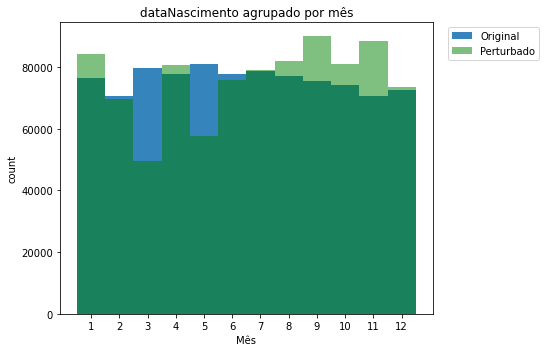

In [2]:
dates_by_month = df[['dataNascimento']].groupby([df['dataNascimento'].dt.month]).count().rename(columns={'dataNascimento':'count'})
dates_by_month

dates_by_month_anon = df_anon[['dataNascimento']].groupby([df_anon['dataNascimento'].dt.month]).count().rename(columns={'dataNascimento':'count'})
dates_by_month_anon

x = np.arange(len(dates_by_month.index))
width = 1

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x, dates_by_month['count'], width, label='Original', alpha=0.9)
rects2 = ax.bar(x, dates_by_month_anon['count'], width, label='Perturbado', color='green', alpha=0.5)

ax.set_ylabel('count')
ax.set_xlabel('Mês')
ax.set_title('dataNascimento agrupado por mês')
ax.set_xticks(x)
ax.set_xticklabels(dates_by_month.index)
ax.legend(bbox_to_anchor=(1.3, 1))
fig.tight_layout()
plt.show()

## Histograma municipioCaso
Separados por região de planejamento

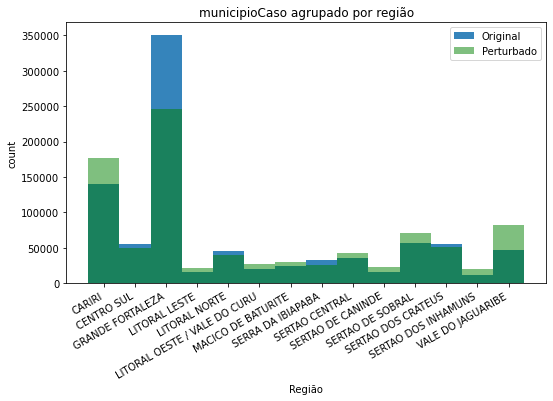

In [3]:
regions_dict = {}
for name, group in df_municipios.groupby('regiaoPlanejamentoCaso'):
    regions_dict[name] = group['municipioCaso'].to_list()
regions = regions_dict.keys()

cities = df['municipioCaso'].unique()
cities_sum = df['municipioCaso'].value_counts()
populations = []

cities_anon = df_anon['municipioCaso'].unique()
cities_sum_anon = df_anon['municipioCaso'].value_counts()
populations_anon = []

for region in regions_dict:
    reg_sum = 0
    reg_anon_sum = 0
    for city in regions_dict[region]:
        if city in cities: 
            reg_sum += cities_sum[city]
        if city in cities_anon: 
            reg_anon_sum += cities_sum_anon[city]
    populations.append(reg_sum)
    populations_anon.append(reg_anon_sum)

x = np.arange(len(regions))
width = 1

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x, populations, width, label='Original', alpha=0.9)
rects2 = ax.bar(x, populations_anon, width, label='Perturbado', color='green', alpha=0.5)

ax.set_ylabel('count')
ax.set_xlabel('Região')
ax.set_title('municipioCaso agrupado por região')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()
fig.tight_layout()
fig.autofmt_xdate()
plt.show()